In [2]:
import pickle
from pathlib import Path
import numpy as np

features_path = (Path().absolute() / Path("../data/processed/features.pkl")).resolve()

with open(features_path, "rb") as f:
    data = pickle.load(f)

X = np.concat(
    [
        np.expand_dims(data["full"]["ALPHA"]["X"], axis=0),
        np.expand_dims(data["full"]["BETA"]["X"], axis=0),
        np.expand_dims(data["full"]["THETA"]["X"], axis=0),
        np.expand_dims(data["full"]["DELTA"]["X"], axis=0),
    ]
)
y = data["full"]["ALPHA"]["y"]
X.shape

(4, 90, 30, 30)

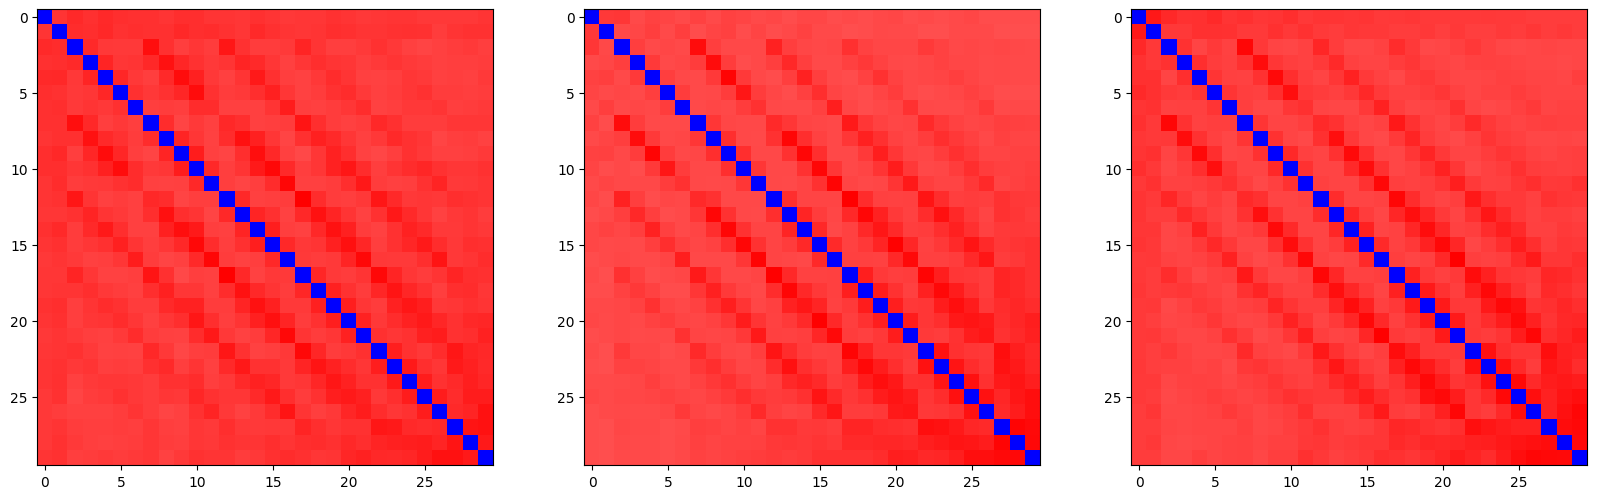

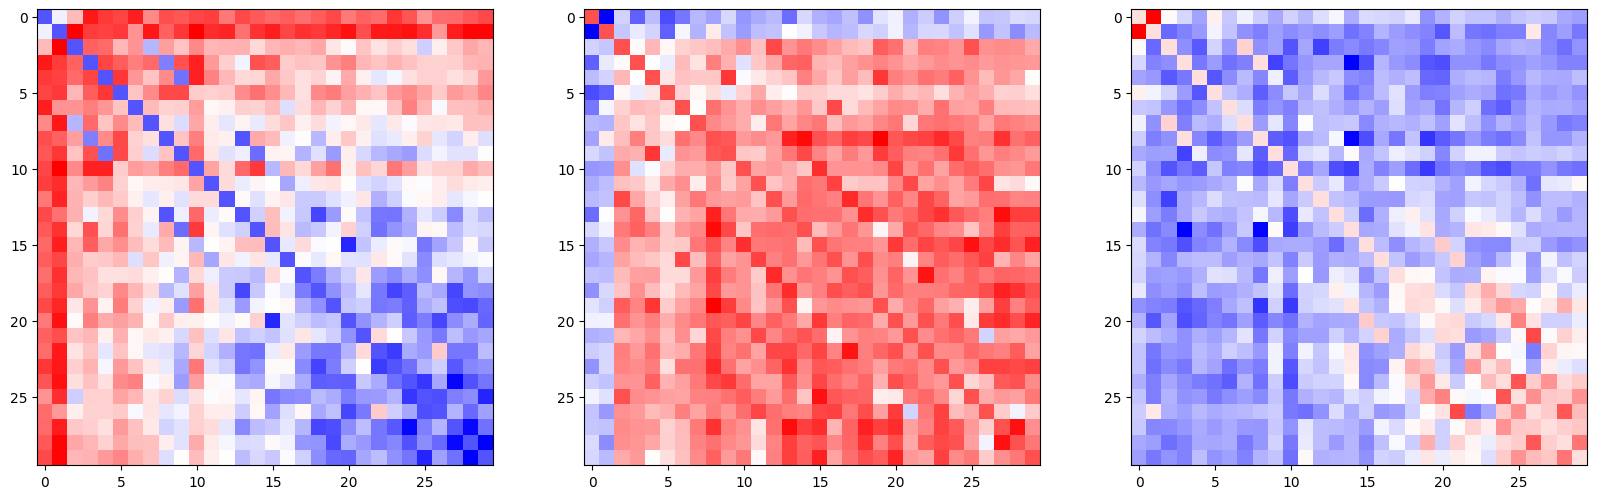

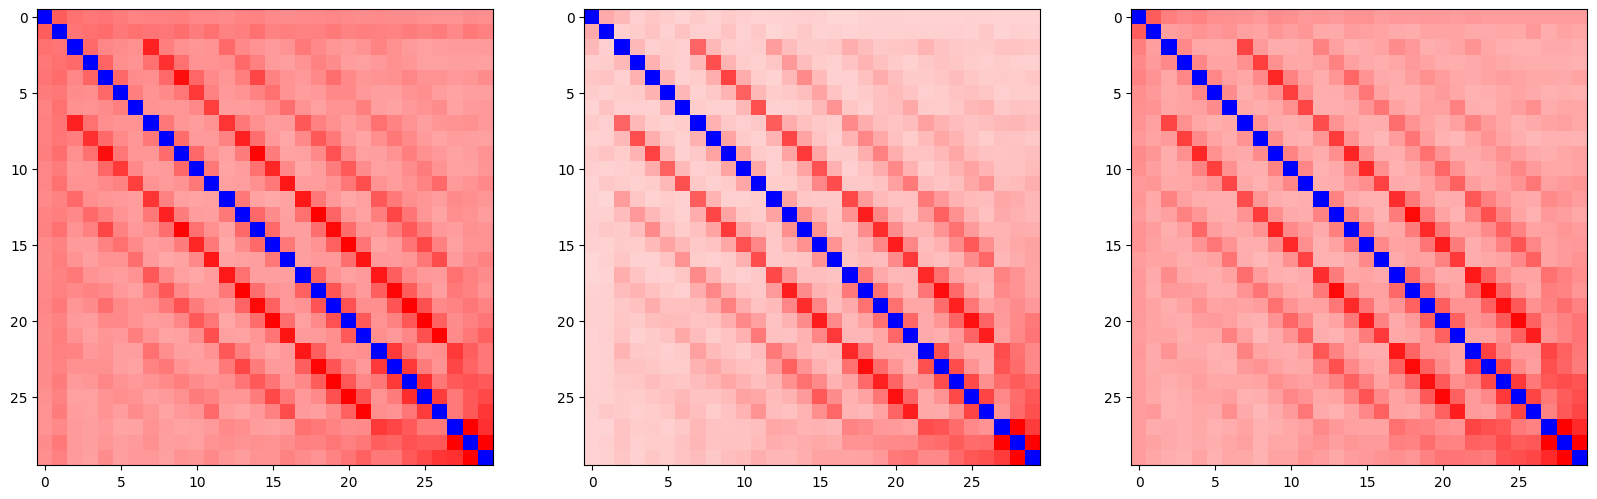

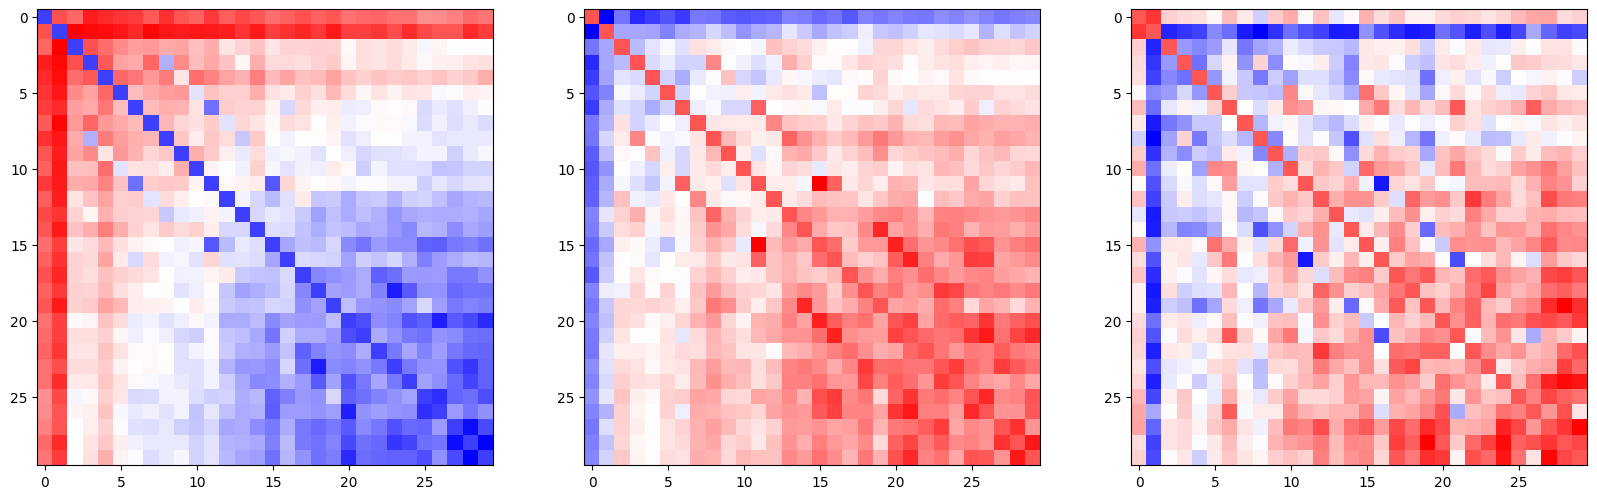

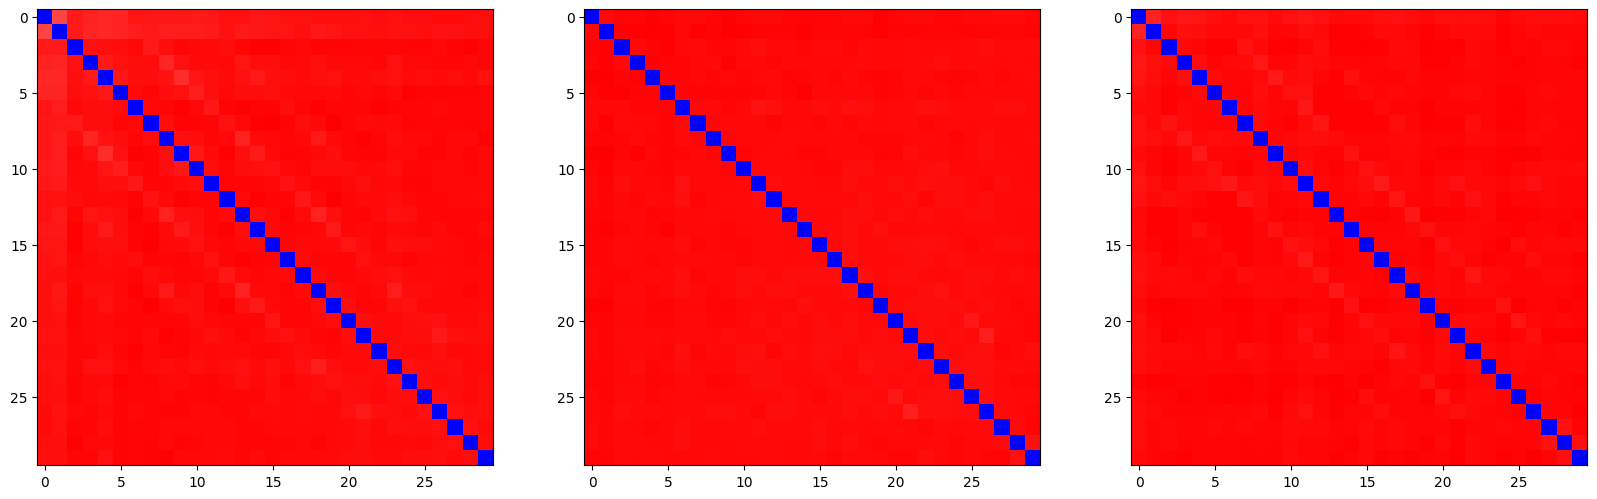

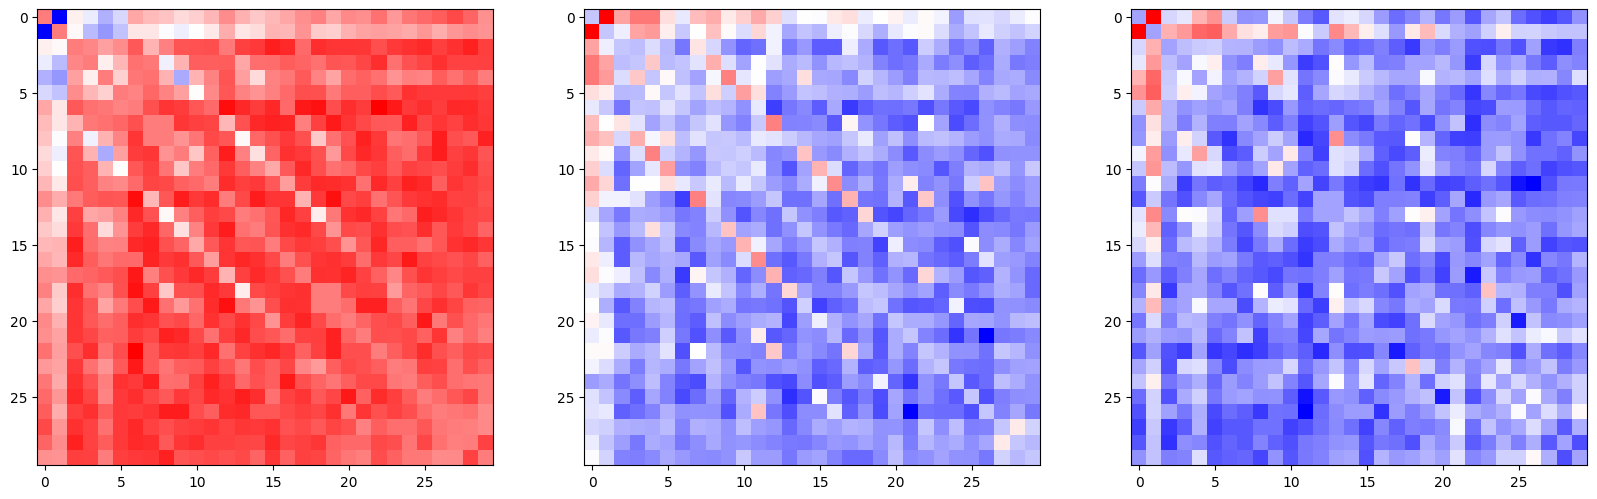

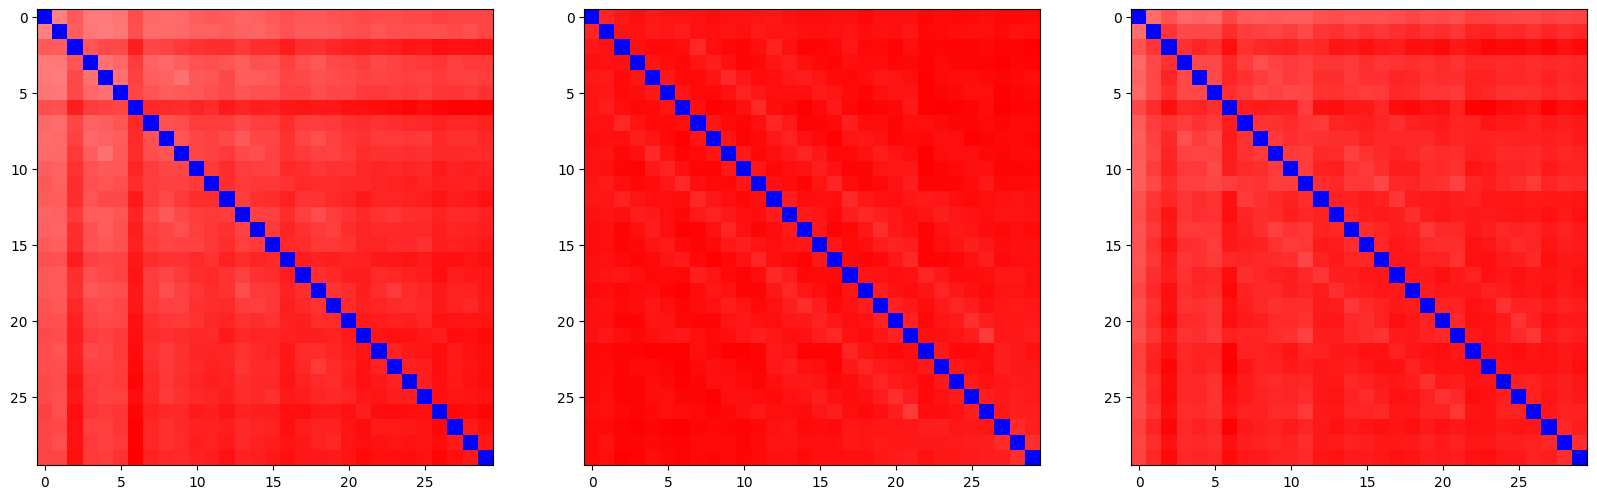

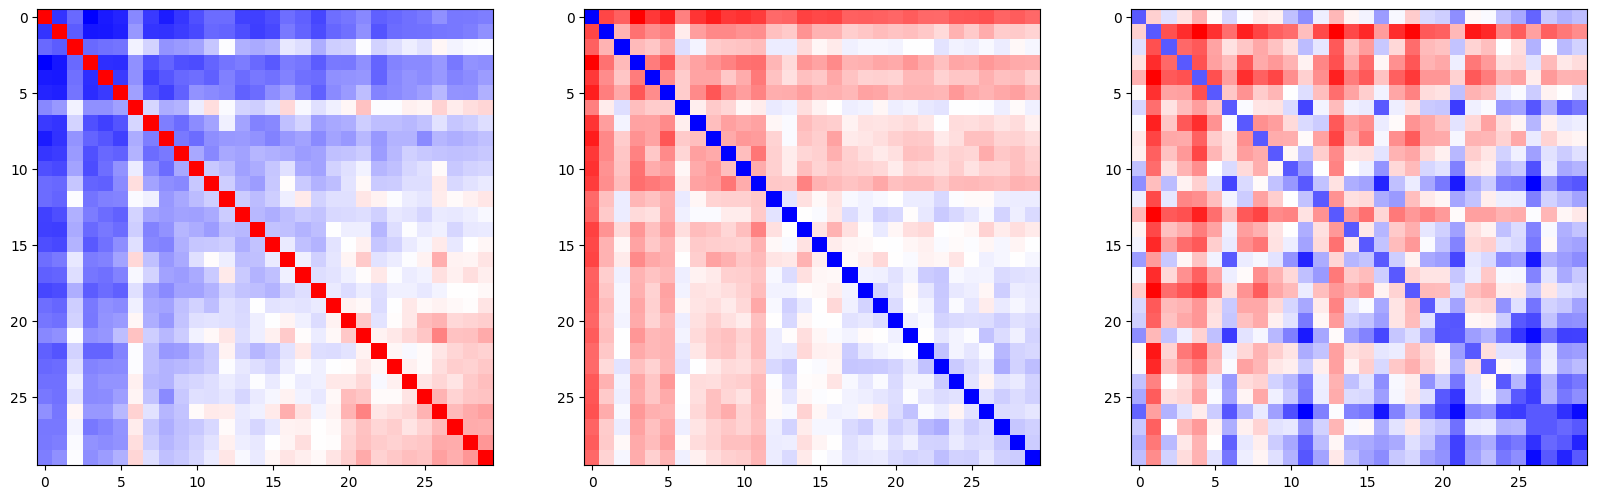

In [ ]:
import matplotlib.pyplot as plt

band = 0
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(X[band][y == 0].mean(0), cmap="bwr")
ax[1].imshow(X[band][y == 1].mean(0), cmap="bwr")
ax[2].imshow(X[band][y == 2].mean(0), cmap="bwr")
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(X[band][y == 0].mean(0) - X[band][y == 1].mean(0), cmap="bwr")
ax[1].imshow(X[band][y == 1].mean(0) - X[band][y == 2].mean(0), cmap="bwr")
ax[2].imshow(X[band][y == 2].mean(0) - X[band][y == 0].mean(0), cmap="bwr")
band = 1
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(X[band][y == 0].mean(0), cmap="bwr")
ax[1].imshow(X[band][y == 1].mean(0), cmap="bwr")
ax[2].imshow(X[band][y == 2].mean(0), cmap="bwr")
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(X[band][y == 0].mean(0) - X[band][y == 1].mean(0), cmap="bwr")
ax[1].imshow(X[band][y == 1].mean(0) - X[band][y == 2].mean(0), cmap="bwr")
ax[2].imshow(X[band][y == 2].mean(0) - X[band][y == 0].mean(0), cmap="bwr")
band = 2
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(X[band][y == 0].mean(0), cmap="bwr")
ax[1].imshow(X[band][y == 1].mean(0), cmap="bwr")
ax[2].imshow(X[band][y == 2].mean(0), cmap="bwr")
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(X[band][y == 0].mean(0) - X[band][y == 1].mean(0), cmap="bwr")
ax[1].imshow(X[band][y == 1].mean(0) - X[band][y == 2].mean(0), cmap="bwr")
ax[2].imshow(X[band][y == 2].mean(0) - X[band][y == 0].mean(0), cmap="bwr")
band = 3
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(X[band][y == 0].mean(0), cmap="bwr")
ax[1].imshow(X[band][y == 1].mean(0), cmap="bwr")
ax[2].imshow(X[band][y == 2].mean(0), cmap="bwr")
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(X[band][y == 0].mean(0) - X[band][y == 1].mean(0), cmap="bwr")
ax[1].imshow(X[band][y == 1].mean(0) - X[band][y == 2].mean(0), cmap="bwr")
ax[2].imshow(X[band][y == 2].mean(0) - X[band][y == 0].mean(0), cmap="bwr")

In [3]:
X.shape

(4, 90, 30, 30)

In [ ]:
X_diff_01 = X[0, y == 0].mean(0) - X[0, y == 1].mean(0)
X_diff_12 = X[0, y == 1].mean(0) - X[0, y == 2].mean(0)
X_diff_20 = X[0, y == 2].mean(0) - X[0, y == 0].mean(0)
X_diff_01.shape, X_diff_12.shape, X_diff_20.shape

((30, 30), (30, 30), (30, 30))

In [8]:
from sklearn.decomposition import PCA

pca_01 = PCA(n_components=2).fit(X_diff_01)
pca_12 = PCA(n_components=2).fit(X_diff_12)
pca_20 = PCA(n_components=2).fit(X_diff_20)
r = pca_01.transform(X[0])
r.shape

ValueError: Found array with dim 3, while dim <= 2 is required by PCA.